# Decision Trees and Random Forests

- This project contains Kyphosis (a medical spine condition) patients **Dataset** with the object of training a model to predict whether or not a corrective surgery was succcessful. So the model will help us predict whether Kyphosis was present or absent after the corrective surgery.
- **Age** represengts the age of person in Months
- **Number** represents the number of vertebra operated on 
- **Start** represents the start of the topmost vertebra the operation started from

## Environmnt Setup

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('kyphosis.csv')

In [8]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## Exploratory Data Analysis (EDA)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


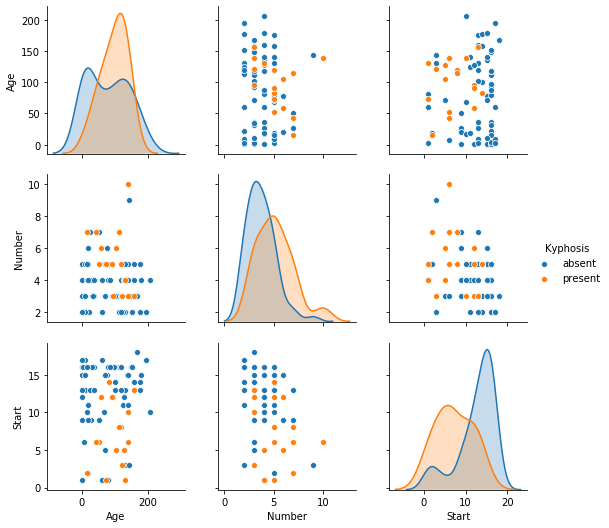

In [10]:
sns.pairplot(df,hue='Kyphosis')

- I can observe that the columns are related to each other as well as their distributions.

# Train_Test_Split

- Import **train_test_split** from scikit-learn
- Set my X data to the features and drop the 'Target column' which is 'Kyphosis'

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df[['Age', 'Number', 'Start']]
y = df['Kyphosis']

In [13]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Training a Single Decision Tree Model

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dtree = DecisionTreeClassifier()

In [16]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Predictions  and Evaluation

In [17]:
predictions = dtree.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[18  1]
 [ 5  1]]


              precision    recall  f1-score   support

      absent       0.78      0.95      0.86        19
     present       0.50      0.17      0.25         6

    accuracy                           0.76        25
   macro avg       0.64      0.56      0.55        25
weighted avg       0.71      0.76      0.71        25



## Compare Models  with Random Forest Model 

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rfc = RandomForestClassifier(n_estimators=200)

In [22]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
rfc_pred = rfc.predict(X_test)

In [24]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[19  0]
 [ 5  1]]


              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



## Results Interpretation 
 
- Random Forest appeared to perform better with a model accuracy of 84% compared to 71%. 
- It's interesting to note also that the confusion matrix indicates, we have 5 and 1 that are being mislabled in the first model while 5 and 0 in the Random Forest models.

- Random Forest model provided a better predictions! And as the data gets better the Random Forest Models appeared to provide a much better results!

**It is important to note that there were more absent data than the present data available in our dataset. This unbalanced dataset can also affect the model prediction results**.

In [25]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

# Tree Visualization

- **Scikit-learn** contain some built-in visualization capabilities for decision trees.
- But to use these, I will first **install the pydot library** 

In [35]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
from sklearn import preprocessing
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

features = list(df.columns[1:])
features


['Age', 'Number', 'Start']

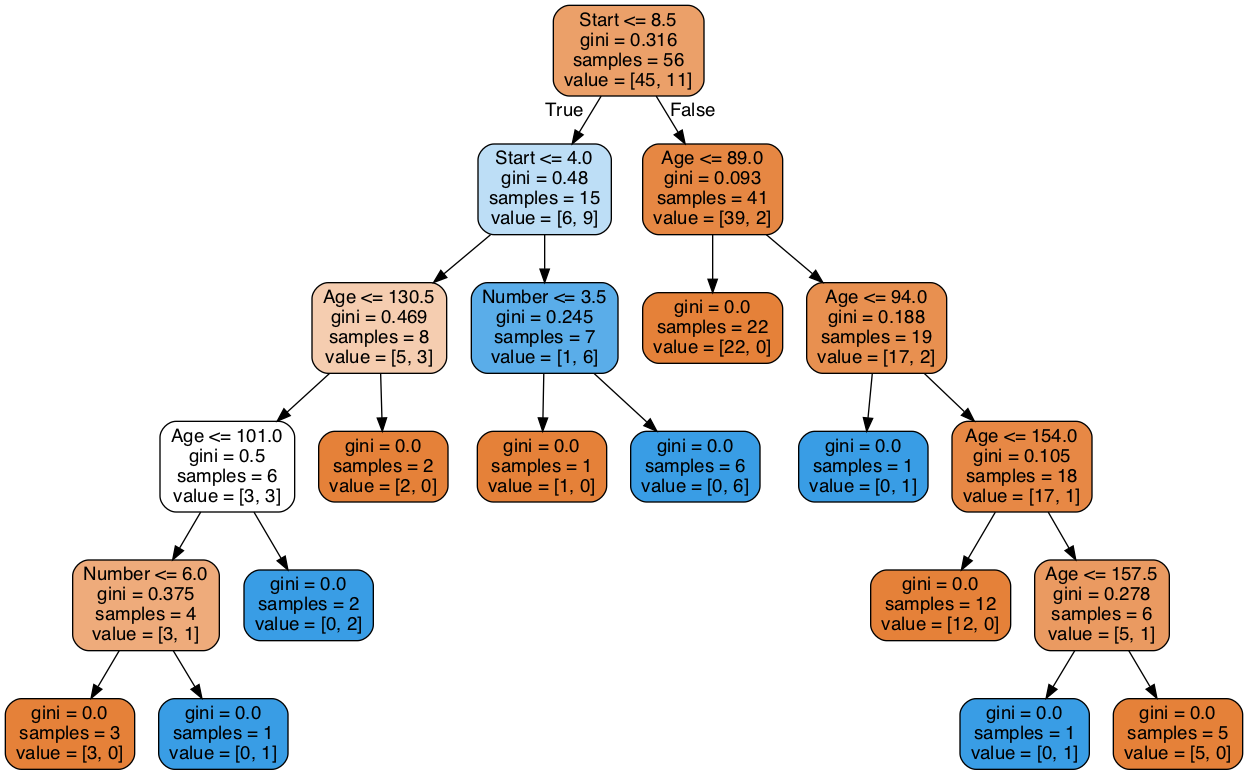

In [36]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

# Alternative Visualisation 

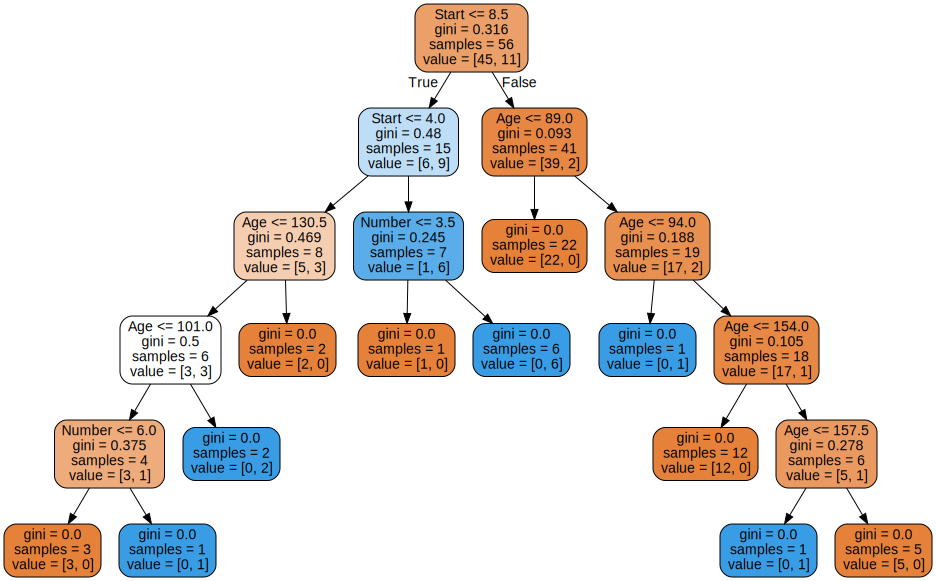

<Figure size 720x288 with 0 Axes>

In [38]:
plt.figure(figsize=(10,4))
from graphviz import Source
Source(tree.export_graphviz(dtree, out_file=None, feature_names=X.columns,filled=True,rounded=True))

# Random Forests
- Comparing the **Decision Trees** model with **Random Forests** model

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
rfc_pred = rfc.predict(X_test)

In [42]:
print(confusion_matrix(y_test,rfc_pred))

[[19  0]
 [ 5  1]]


In [43]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25

